# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, matthews_corrcoef, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, roc_auc_score, matthews_corrcoef, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

# IMPORTING DATASET

In [15]:
df = pd.read_csv(r"/Users/mac/Desktop/datasets/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# DATA PREPROCESSING

In [18]:
df.shape

(10000, 14)

In [20]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [22]:
df.shape

(10000, 14)

In [23]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [26]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [28]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

In [30]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [32]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [34]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [36]:
print(df[['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']].dtypes)

Geography         object
Gender            object
HasCrCard          int64
IsActiveMember     int64
dtype: object


In [38]:
df['Geography'] = df['Geography'].astype(str)
df['Gender'] = df['Gender'].astype(str)
df['HasCrCard'] = df['HasCrCard'].astype(str)
df['IsActiveMember'] = df['IsActiveMember'].astype(str)

In [40]:
print(df[['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']].dtypes)

Geography         object
Gender            object
HasCrCard         object
IsActiveMember    object
dtype: object


# EXPLORATORY DATA ANALYSIS

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [18]:
#Plotting distribution of the dependent variable

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


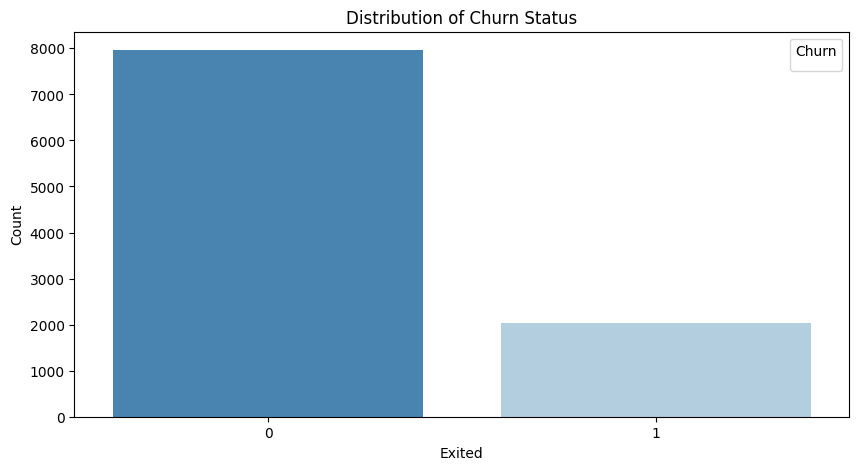

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Exited', palette="Blues_r")
plt.title("Distribution of Churn Status")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.legend(title='Churn')
plt.show()

In [20]:
#Pairplots of categorical variables with the dependent variable

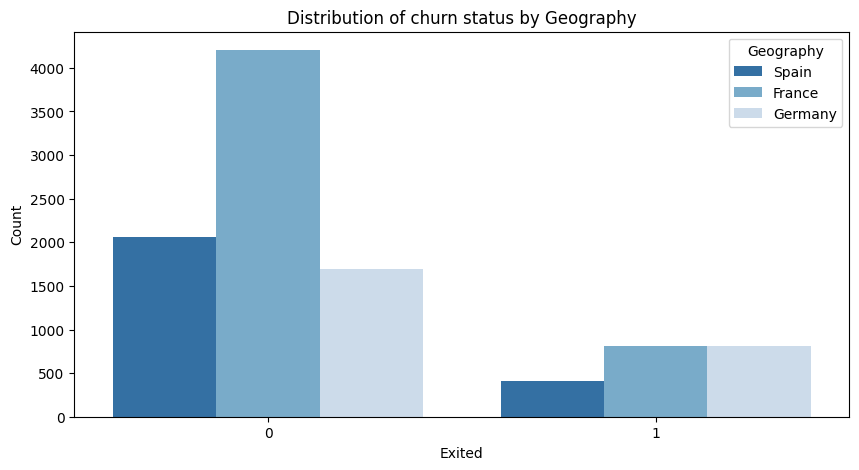

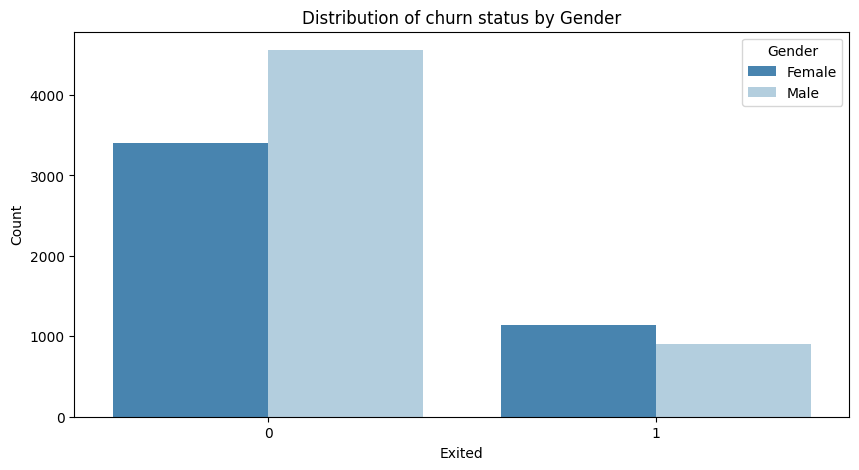

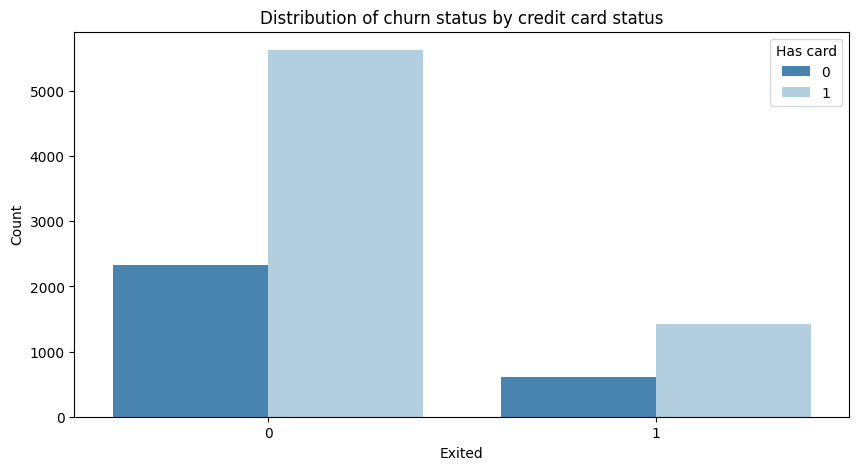

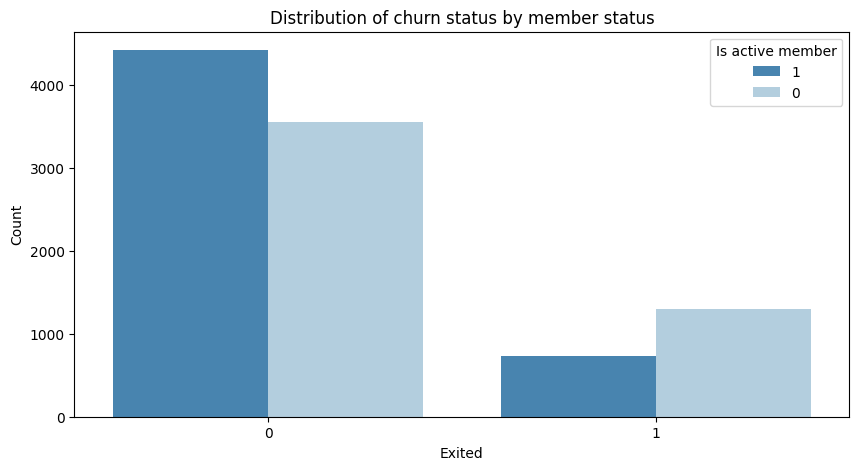

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Exited', palette="Blues_r", hue='Geography')
plt.title("Distribution of churn status by Geography")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.legend(title='Geography')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Exited', palette="Blues_r", hue='Gender')
plt.title("Distribution of churn status by Gender")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Exited', palette="Blues_r", hue='HasCrCard')
plt.title("Distribution of churn status by credit card status")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.legend(title='Has card')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Exited', palette="Blues_r", hue='IsActiveMember')
plt.title("Distribution of churn status by member status")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.legend(title='Is active member')
plt.show()

In [12]:
#Plotting numeric columns with the dependent variable

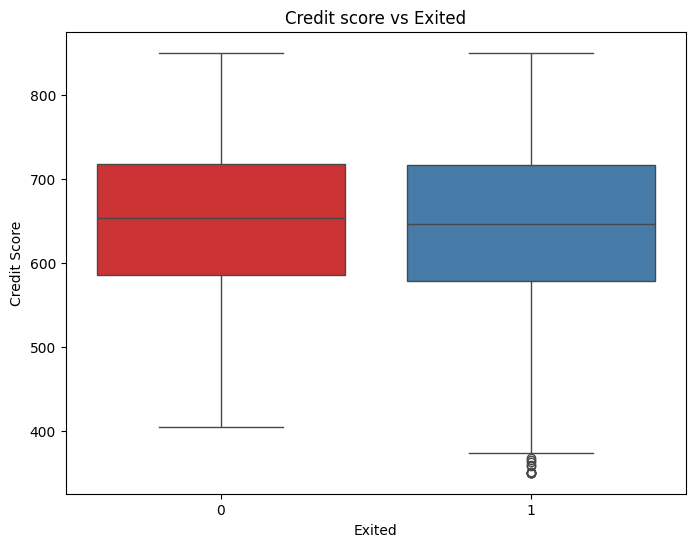

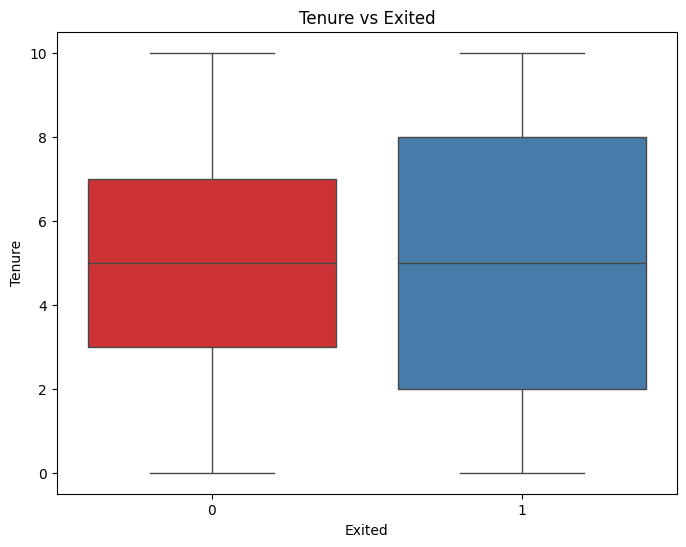

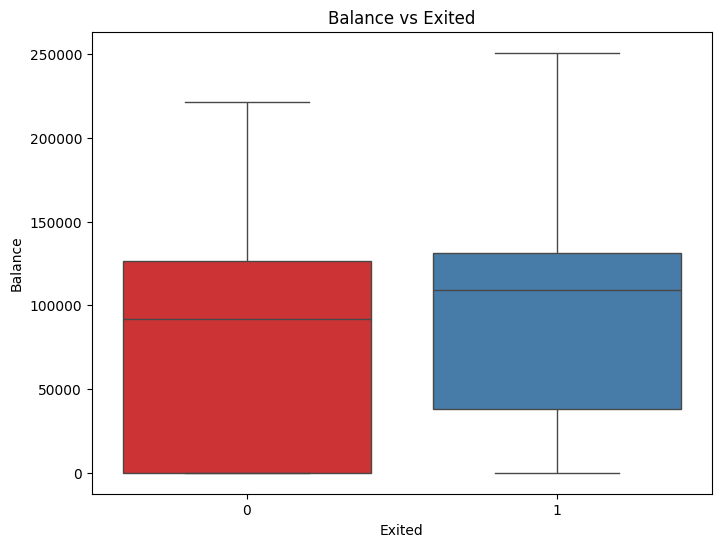

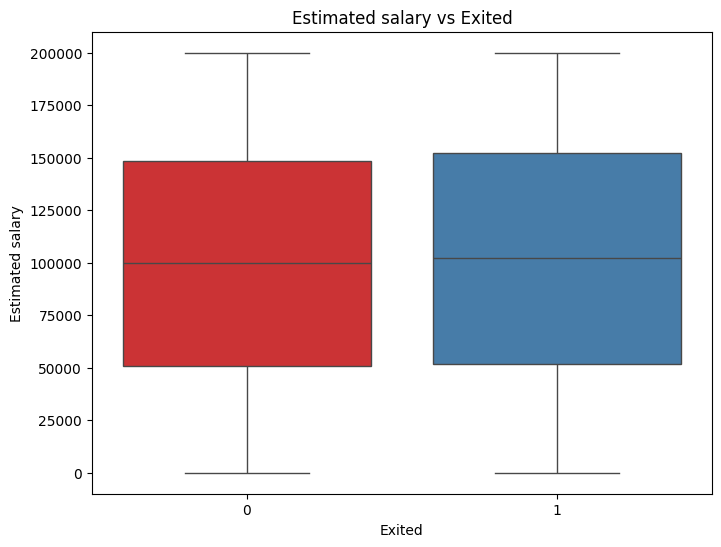

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='CreditScore', data=df, palette='Set1')
plt.title('Credit score vs Exited')
plt.xlabel('Exited')
plt.ylabel('Credit Score')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Tenure', data=df, palette='Set1')
plt.title('Tenure vs Exited')
plt.xlabel('Exited')
plt.ylabel('Tenure')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Balance', data=df, palette='Set1')
plt.title('Balance vs Exited')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, palette='Set1')
plt.title('Estimated salary vs Exited')
plt.xlabel('Exited')
plt.ylabel('Estimated salary')
plt.show()

In [45]:
#Encoding categorical variables manually

In [47]:
df['Geography'] = df['Geography'].replace({'France': 0, 'Spain': 1, 'Germany':2})

In [49]:
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

In [51]:
#Casting variables back to int

In [53]:
df['HasCrCard'] = df['HasCrCard'].astype(int)
df['IsActiveMember'] = df['IsActiveMember'].astype(int)

In [55]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [57]:
# Calculate the correlation matrix

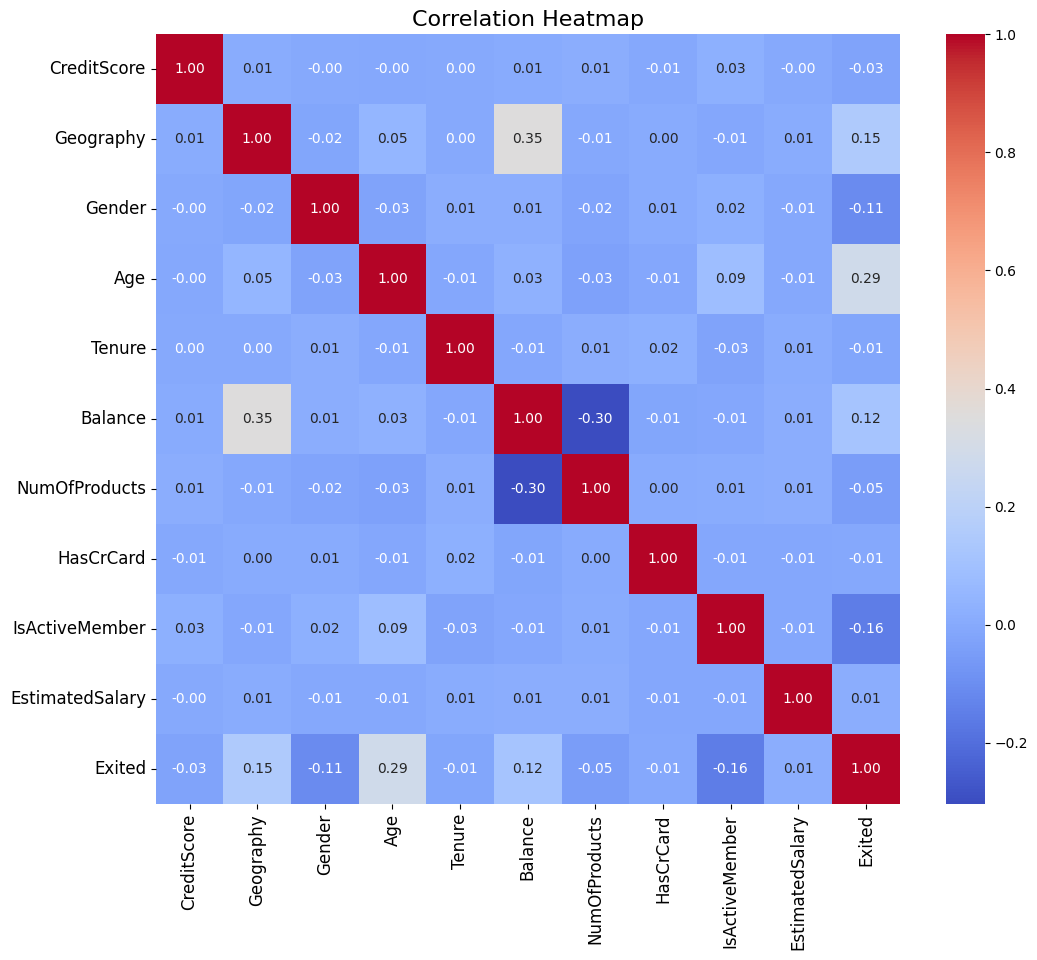

In [59]:
correlation_matrix = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

plt.show()

In [61]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [63]:
#Definning dependent and independent features

In [65]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

In [67]:
X.shape, y.shape

((10000, 10), (10000,))

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# FITTING MODELS

# Fitting models on the original dataset

In [73]:
# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort DataFrame based on accuracy
results_df = results_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
      Random Forest     86.75  76.016260 47.582697    96.328563 67.702089  85.794892 53.124856
            XGBoost     86.50  71.134021 52.671756    94.772869 70.653049  85.304433 53.465508
  Gradient Boosting     86.50  74.117647 48.091603    95.892968 67.909105  87.118222 52.400662
           AdaBoost     85.75  69.565217 48.854962    94.772869 68.045021  85.259148 50.262566
Logistic Regression     80.05  45.161290  7.124682    97.884256 26.408222  66.883910 11.483576
                KNN     76.40  24.183007  9.414758    92.781581 29.555307  53.725748  3.283405


# Visualizing evalution metrics on the normal models

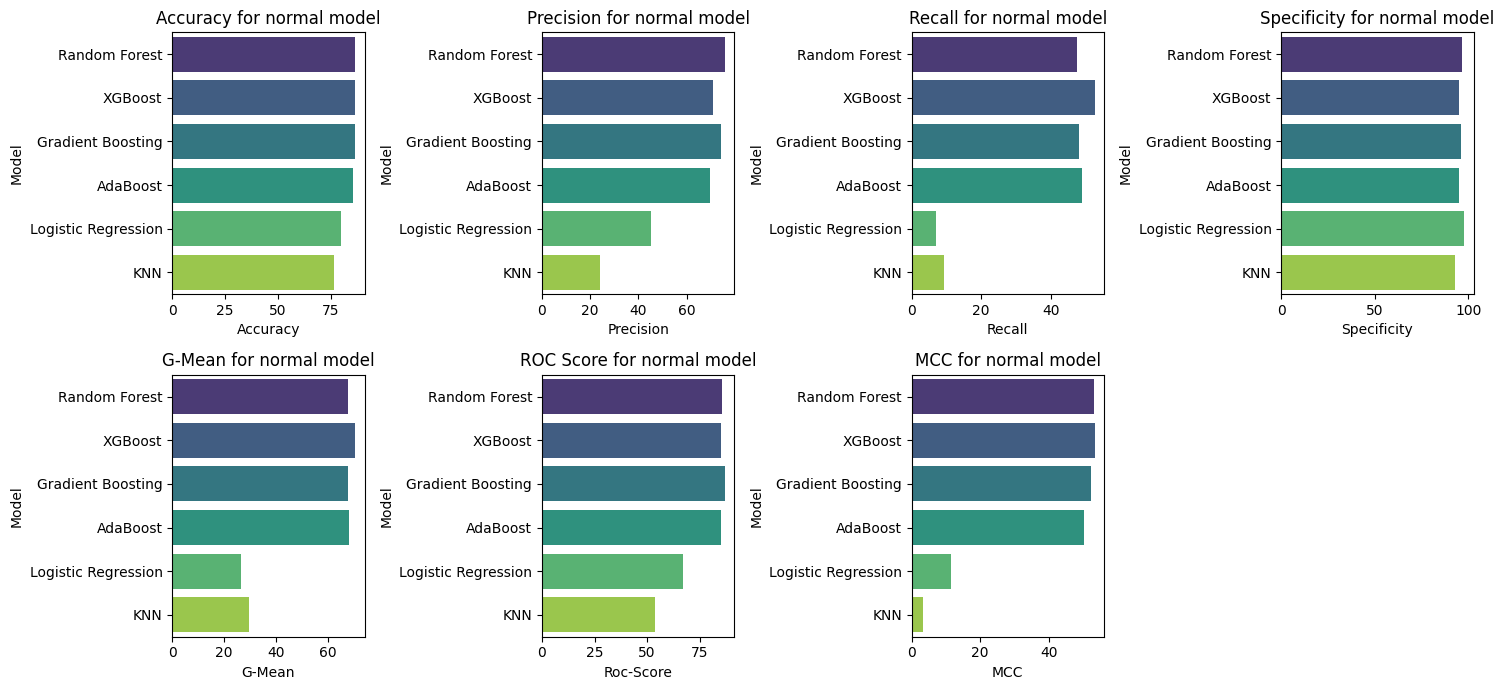

In [76]:
# Plot the results
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Accuracy for normal model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results_df, palette='viridis')
plt.title('Precision for normal model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results_df, palette='viridis')
plt.title('Recall for normal model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results_df, palette='viridis')
plt.title('Specificity for normal model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results_df, palette='viridis')
plt.title('G-Mean for normal model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results_df, palette='viridis')
plt.title('ROC Score for normal model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results_df, palette='viridis')
plt.title('MCC for normal model')

plt.tight_layout()
plt.show()

# Fitting models on SMOTE dataset

In [102]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results1 = []
for name, clf in classifiers.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results1.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results1_df = pd.DataFrame(results1)

# Sort DataFrame based on accuracy
results1_df = results1_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results1_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
      Random Forest     81.65  52.663934 65.394402    85.625389 74.829280  83.598158 47.201639
            XGBoost     81.50  52.410901 63.613232    85.874300 73.910363  84.210301 46.141410
  Gradient Boosting     80.75  50.743494 69.465649    83.509645 76.164635  85.010553 47.469293
           AdaBoost     79.00  47.660312 69.974555    81.207218 75.381954  83.618663 44.887889
Logistic Regression     63.20  30.444698 67.938931    62.041070 64.923062  70.989675 24.007459
                KNN     56.35  19.849246 40.203562    60.298693 49.236392  50.478505  0.407717


# Visualizing evaluation metrics on the SMOTE models

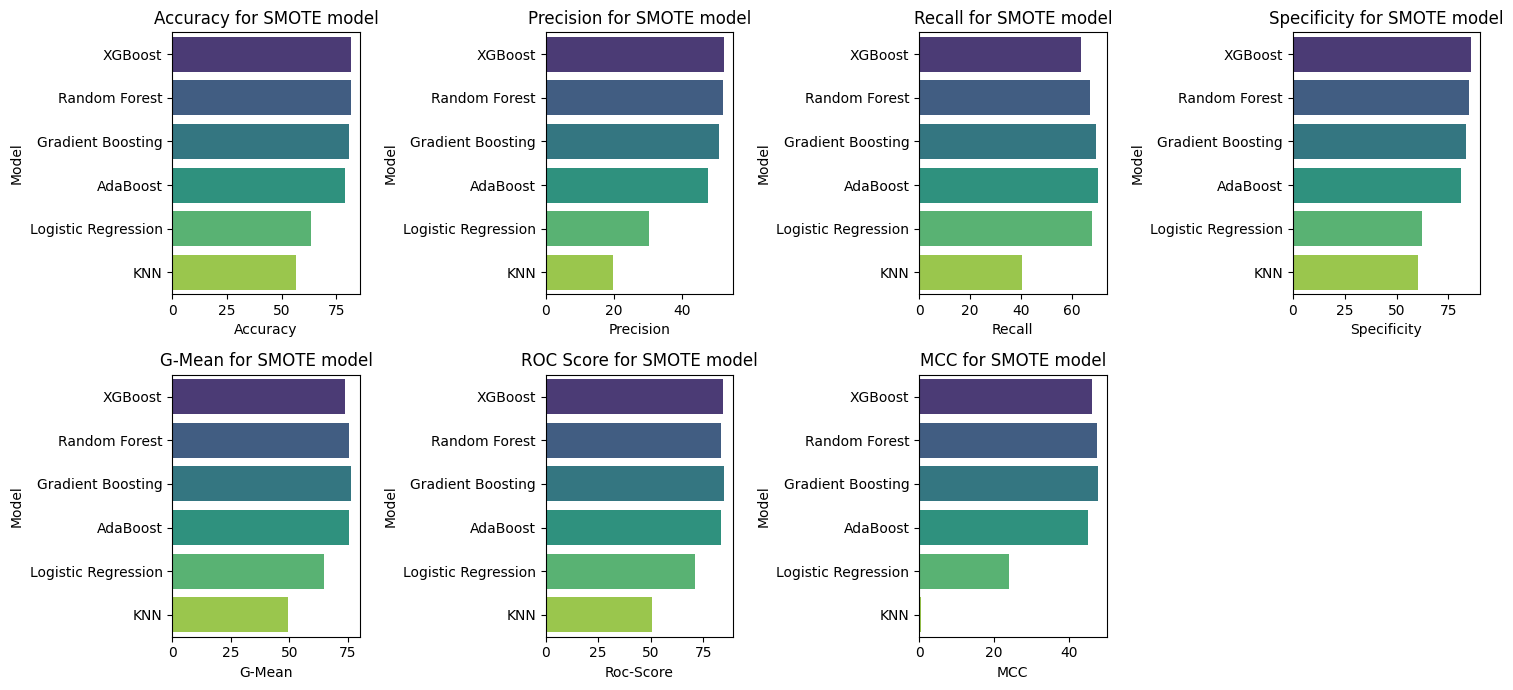

In [80]:
# Plot the results for SMOTE Models
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results1_df, palette='viridis')
plt.title('Accuracy for SMOTE model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results1_df, palette='viridis')
plt.title('Precision for SMOTE model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results1_df, palette='viridis')
plt.title('Recall for SMOTE model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results1_df, palette='viridis')
plt.title('Specificity for SMOTE model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results1_df, palette='viridis')
plt.title('G-Mean for SMOTE model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results1_df, palette='viridis')
plt.title('ROC Score for SMOTE model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results1_df, palette='viridis')
plt.title('MCC for SMOTE model')

plt.tight_layout()
plt.show()


In [82]:
#BordelineSMOTE

In [108]:
from imblearn.over_sampling import BorderlineSMOTE

# Apply BorderlineSMOTE to balance the dataset
borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-1')  
X_train_borderline_smote, y_train_borderline_smote = borderline_smote.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results2 = []
for name, clf in classifiers.items():
    clf.fit(X_train_borderline_smote, y_train_borderline_smote)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results2.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results2_df = pd.DataFrame(results2)

# Sort DataFrame based on accuracy
results2_df = results2_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results2_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
      Random Forest     81.35  52.024291 65.394402    85.252022 74.665956  83.553268 46.663471
  Gradient Boosting     81.30  51.762523 70.992366    83.820784 77.140364  84.672576 49.087339
            XGBoost     80.45  50.202429 63.104326    84.691973 73.105607  83.294777 44.037486
           AdaBoost     78.30  46.471601 68.702290    80.647169 74.435510  83.188214 43.192401
Logistic Regression     63.30  30.379747 67.175573    62.352209 64.718972  70.854452 23.669759
                KNN     57.50  19.654714 37.659033    62.352209 48.457444  51.452535  0.009220


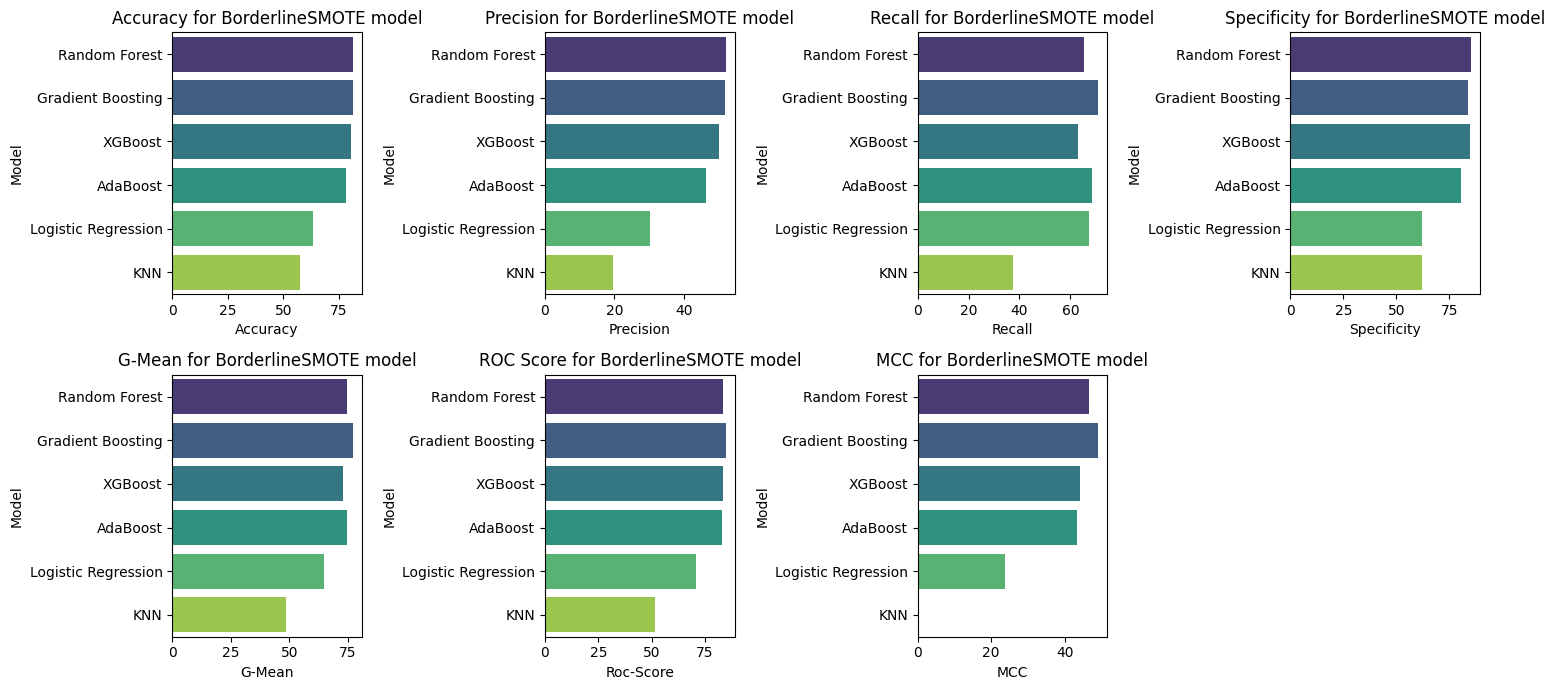

In [110]:
# Plot the results for BorderlineSMOTE Models
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results2_df, palette='viridis')
plt.title('Accuracy for BorderlineSMOTE model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results2_df, palette='viridis')
plt.title('Precision for BorderlineSMOTE model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results2_df, palette='viridis')
plt.title('Recall for BorderlineSMOTE model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results2_df, palette='viridis')
plt.title('Specificity for BorderlineSMOTE model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results2_df, palette='viridis')
plt.title('G-Mean for BorderlineSMOTE model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results2_df, palette='viridis')
plt.title('ROC Score for BorderlineSMOTE model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results2_df, palette='viridis')
plt.title('MCC for BorderlineSMOTE model')

plt.tight_layout()
plt.show()


In [116]:
from imblearn.over_sampling import SVMSMOTE

# Apply SVMSMOTE to balance the dataset
svm_smote = SVMSMOTE(random_state=42)  
X_train_svm_smote, y_train_svm_smote = svm_smote.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results3 = []
for name, clf in classifiers.items():
    clf.fit(X_train_svm_smote, y_train_svm_smote)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results3.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results3_df = pd.DataFrame(results3)

# Sort DataFrame based on accuracy
results3_df = results3_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results3_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
      Random Forest     82.95  56.280193 59.287532    88.736777 72.532644  84.436332 47.099204
            XGBoost     82.30  54.631829 58.524173    88.114499 71.811059  83.368089 45.458832
  Gradient Boosting     82.05  53.441296 67.175573    85.687617 75.869063  85.137622 48.705905
           AdaBoost     79.65  48.767606 70.483461    81.891724 75.973759  83.626738 46.151317
                KNN     62.75  20.469799 31.043257    70.504045 46.783279  52.706274  1.344227
Logistic Regression     62.00  29.633740 67.938931    60.547604 64.136881  68.352358 22.750063


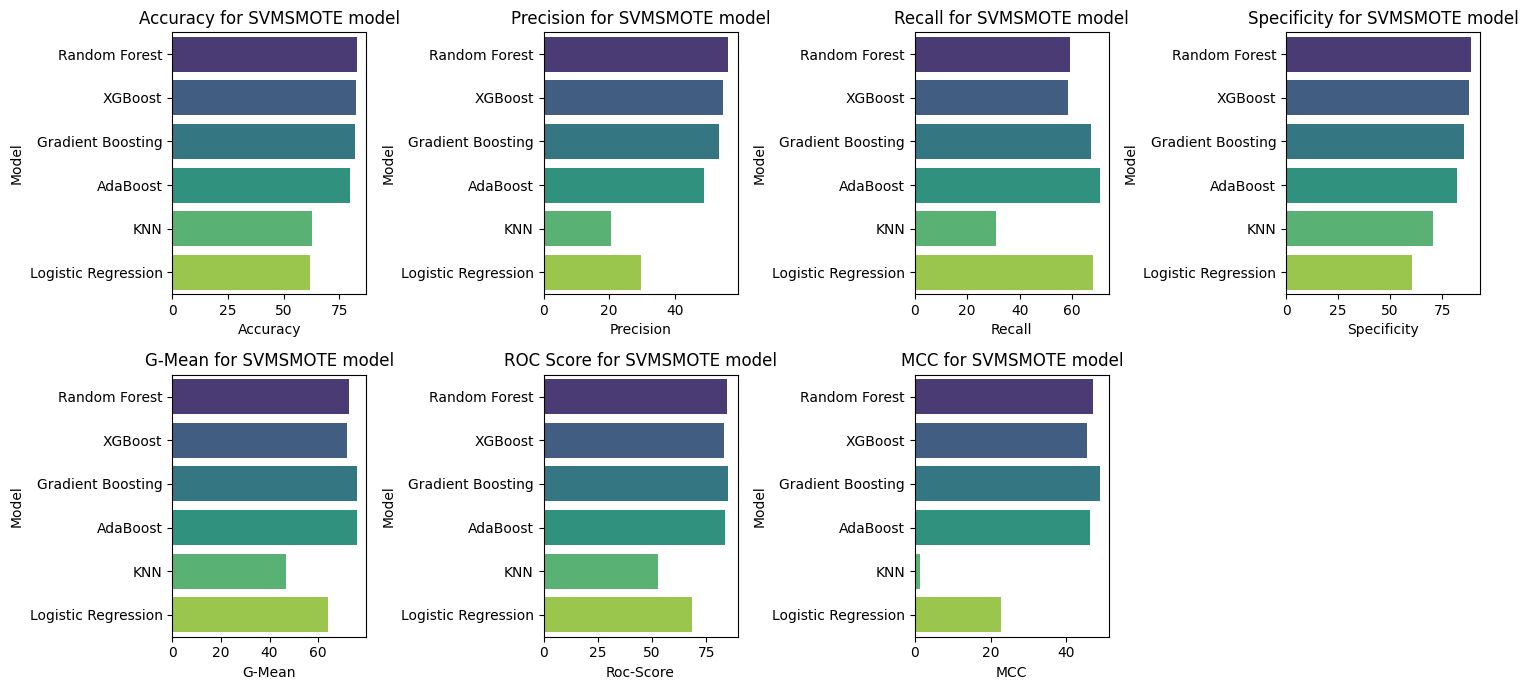

In [118]:
# Plot the results for SVMSMOTE
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results3_df, palette='viridis')
plt.title('Accuracy for SVMSMOTE model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results3_df, palette='viridis')
plt.title('Precision for SVMSMOTE model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results3_df, palette='viridis')
plt.title('Recall for SVMSMOTE model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results3_df, palette='viridis')
plt.title('Specificity for SVMSMOTE model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results3_df, palette='viridis')
plt.title('G-Mean for SVMSMOTE model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results3_df, palette='viridis')
plt.title('ROC Score for SVMSMOTE model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results3_df, palette='viridis')
plt.title('MCC for SVMSMOTE model')

plt.tight_layout()
plt.show()


In [120]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN to balance the dataset
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results4 = []
for name, clf in classifiers.items():
    clf.fit(X_train_adasyn, y_train_adasyn)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results4.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results4_df = pd.DataFrame(results4)

# Sort DataFrame based on accuracy
results4_df = results4_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results4_df.to_string(index=False))

              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
      Random Forest     81.95  53.292181 65.903308    85.874300 75.228987  84.003588 47.969492
            XGBoost     80.90  51.124744 63.613232    85.127567 73.588312  83.720080 45.061972
  Gradient Boosting     80.65  50.549451 70.229008    83.198507 76.439182  84.964318 47.653045
           AdaBoost     78.45  46.768707 69.974555    80.522713 75.063580  83.577969 44.041904
Logistic Regression     63.55  30.865604 68.956743    62.227754 65.505902  71.042719 24.968892
                KNN     53.25  19.274376 43.256997    55.693839 49.083075  51.586095 -0.839638


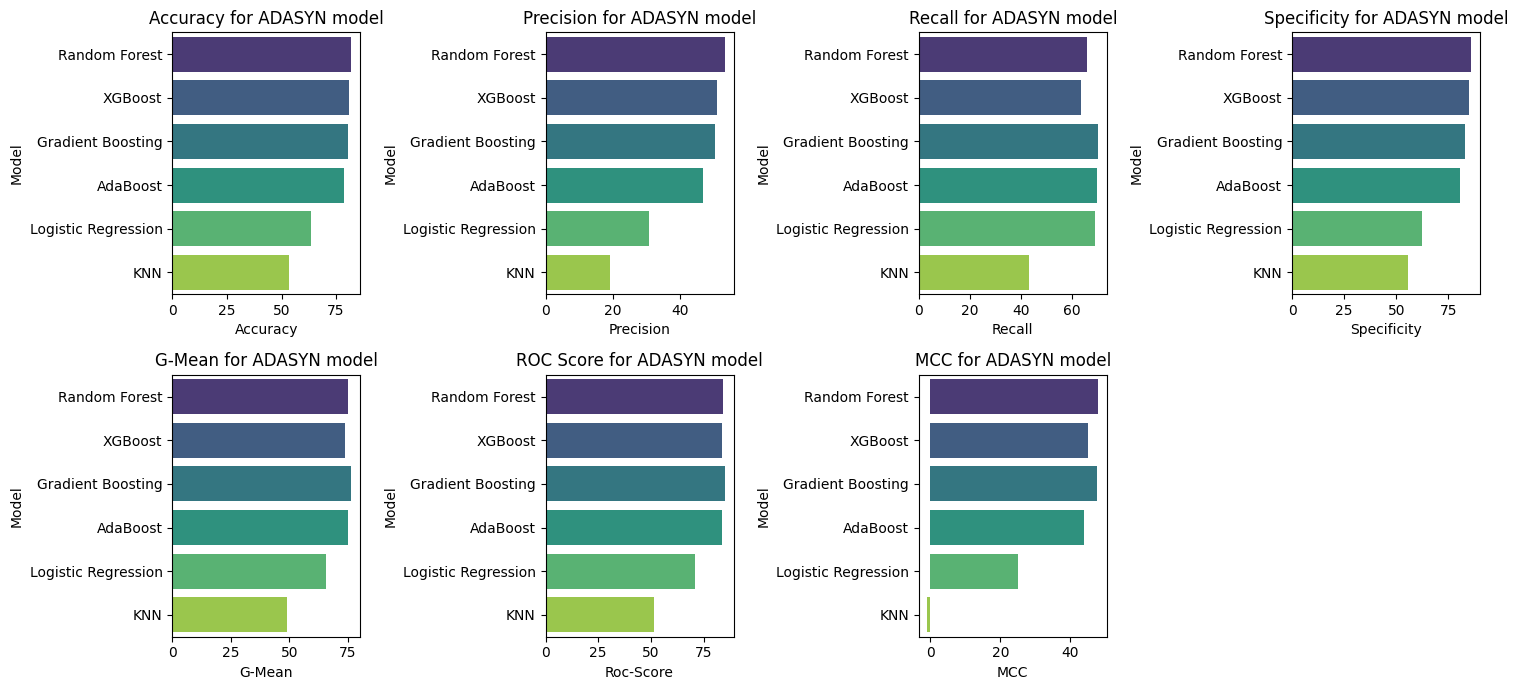

In [122]:
# Plot the results for ADASYN
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results4_df, palette='viridis')
plt.title('Accuracy for ADASYN model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results4_df, palette='viridis')
plt.title('Precision for ADASYN model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results4_df, palette='viridis')
plt.title('Recall for ADASYN model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results4_df, palette='viridis')
plt.title('Specificity for ADASYN model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results4_df, palette='viridis')
plt.title('G-Mean for ADASYN model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results4_df, palette='viridis')
plt.title('ROC Score for ADASYN model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results4_df, palette='viridis')
plt.title('MCC for ADASYN model')

plt.tight_layout()
plt.show()


In [124]:
from imblearn.over_sampling import RandomOverSampler

# Apply Random Over-Sampling to balance the dataset
random_oversampler = RandomOverSampler(random_state=42)
X_train_random_oversampled, y_train_random_oversampled = random_oversampler.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results5 = []
for name, clf in classifiers.items():
    clf.fit(X_train_random_oversampled, y_train_random_oversampled)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results5.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results5_df = pd.DataFrame(results5)

# Sort DataFrame based on accuracy
results5_df = results5_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results5_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
      Random Forest     85.75  66.666667 54.961832    93.279403 71.601724  85.498796 52.025123
            XGBoost     83.00  56.120092 61.832061    88.176727 73.838667  84.461746 48.247198
  Gradient Boosting     80.85  50.827815 78.117048    81.518357 79.799583  87.000654 51.611587
           AdaBoost     78.60  47.344461 79.389313    78.406970 78.896612  85.425484 48.859275
Logistic Regression     63.20  30.309989 67.175573    62.227754 64.654350  70.835609 23.563762
                KNN     56.05  21.344340 46.055980    58.494088 51.903782  53.611347  3.658457


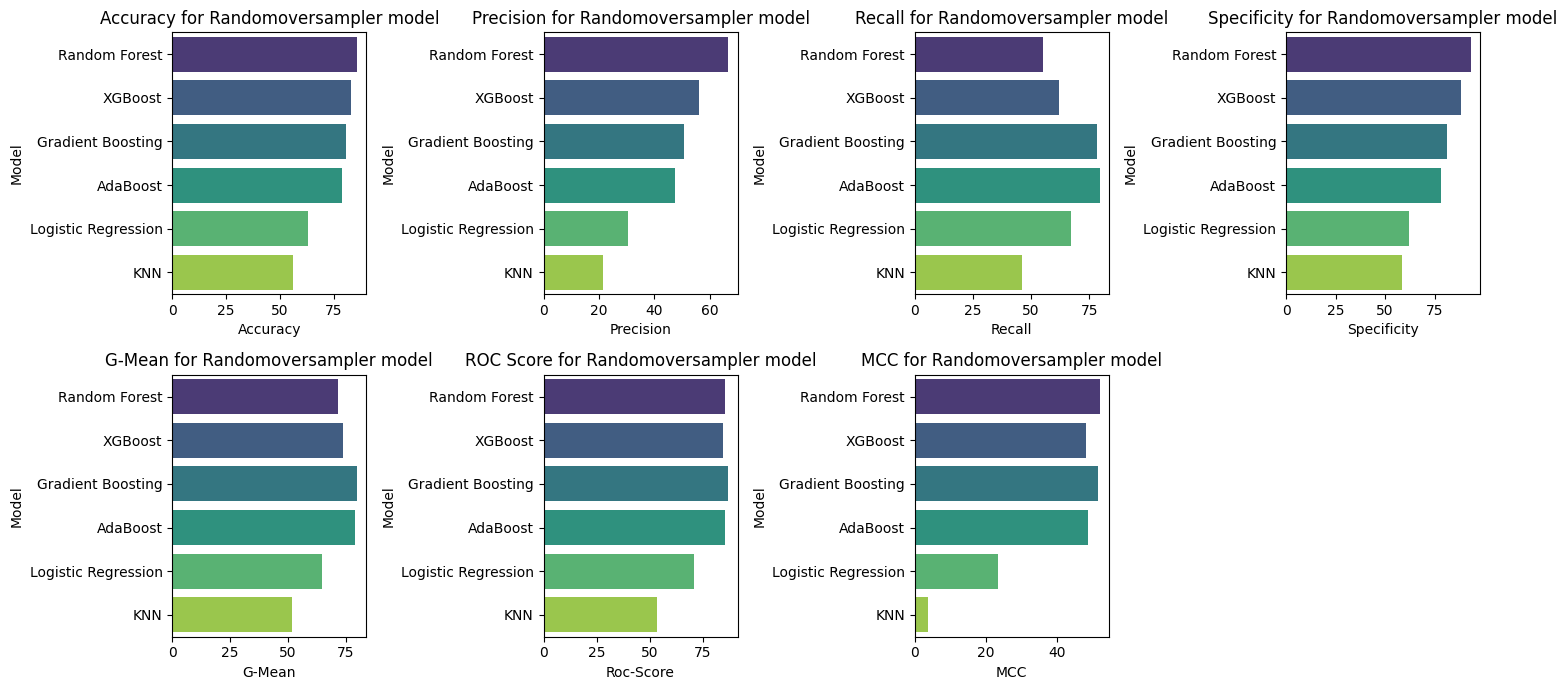

In [126]:
# Plot the results for Randomoversampler
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results5_df, palette='viridis')
plt.title('Accuracy for Randomoversampler model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results5_df, palette='viridis')
plt.title('Precision for Randomoversampler model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results5_df, palette='viridis')
plt.title('Recall for Randomoversampler model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results5_df, palette='viridis')
plt.title('Specificity for Randomoversampler model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results5_df, palette='viridis')
plt.title('G-Mean for Randomoversampler model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results5_df, palette='viridis')
plt.title('ROC Score for Randomoversampler model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results5_df, palette='viridis')
plt.title('MCC for Randomoversampler model')

plt.tight_layout()
plt.show()


# Computing and visualizing the confusion matrix for the normal and SMOTE models

Confusion Matrices for KNN:


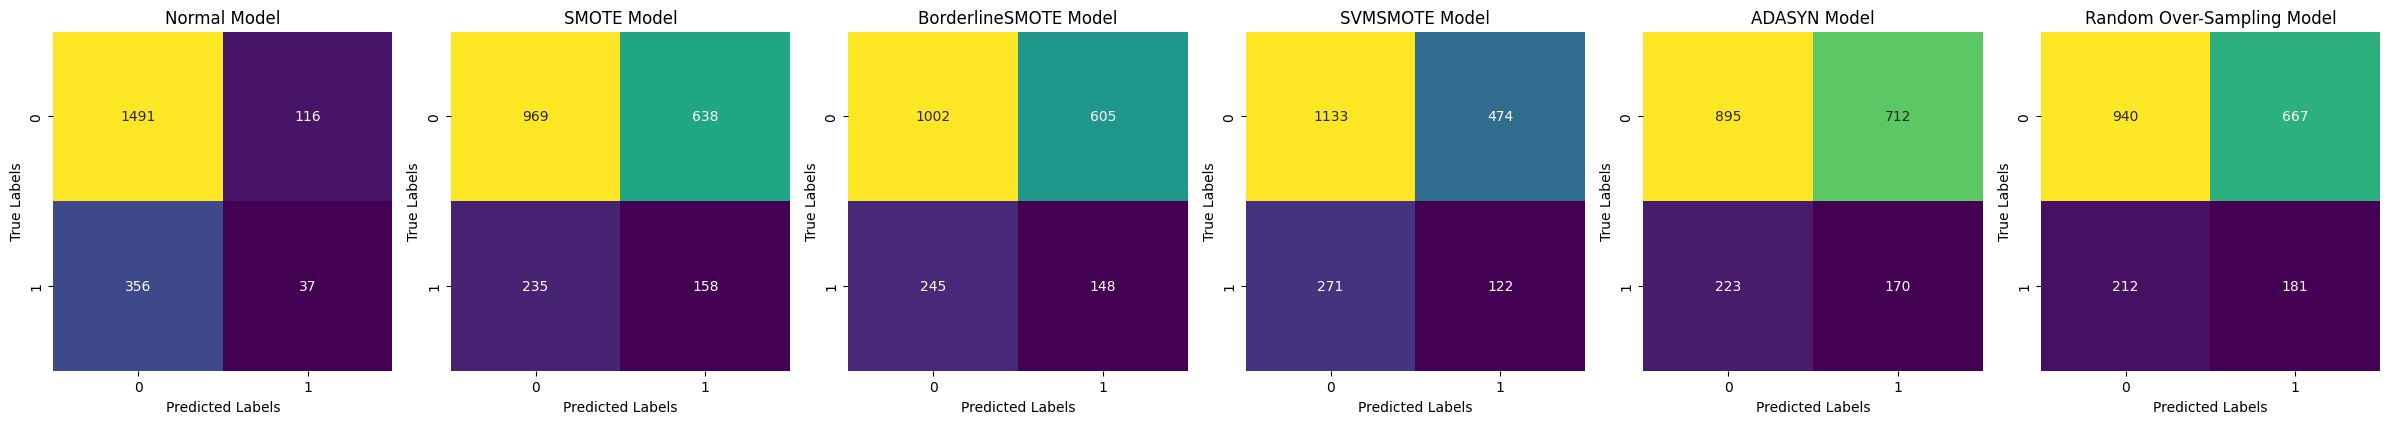

Confusion Matrices for Logistic Regression:


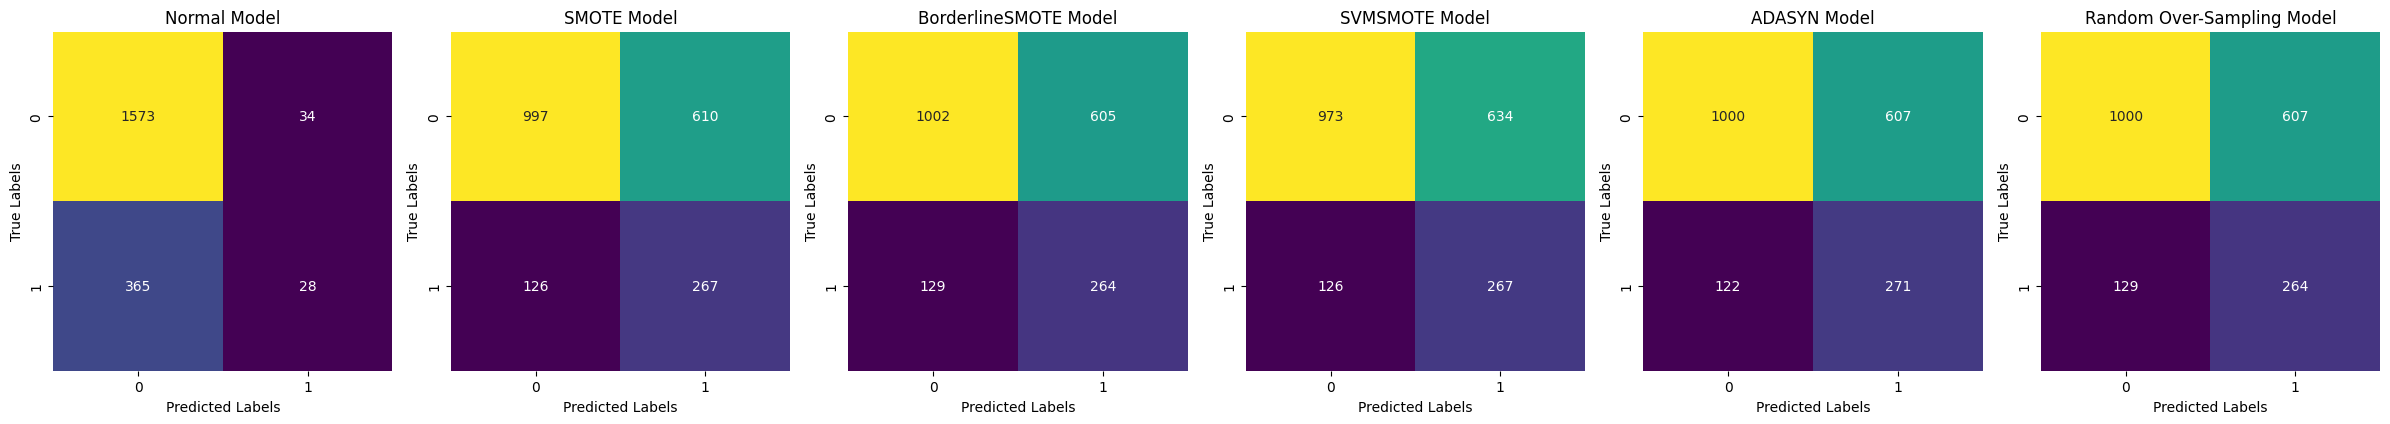

Confusion Matrices for Random Forest:


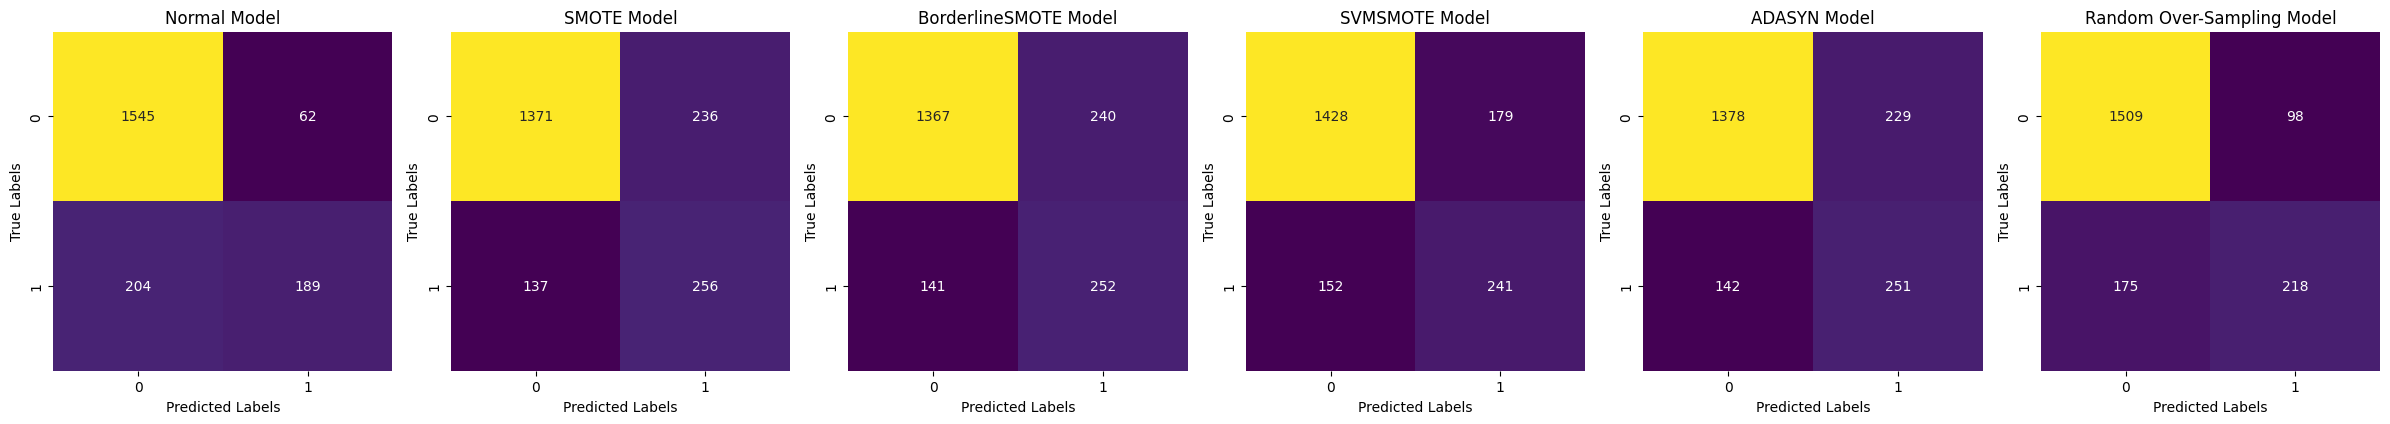

Confusion Matrices for XGBoost:


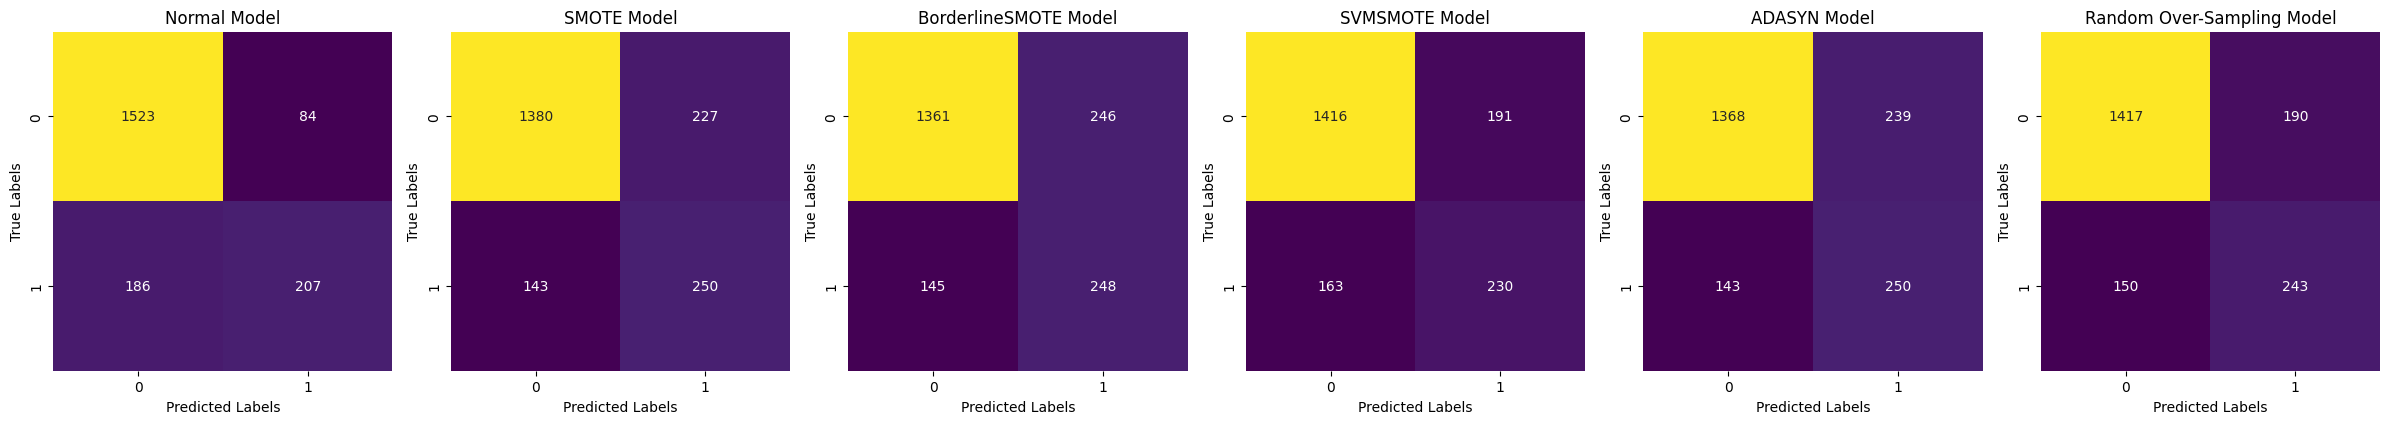

Confusion Matrices for Gradient Boosting:


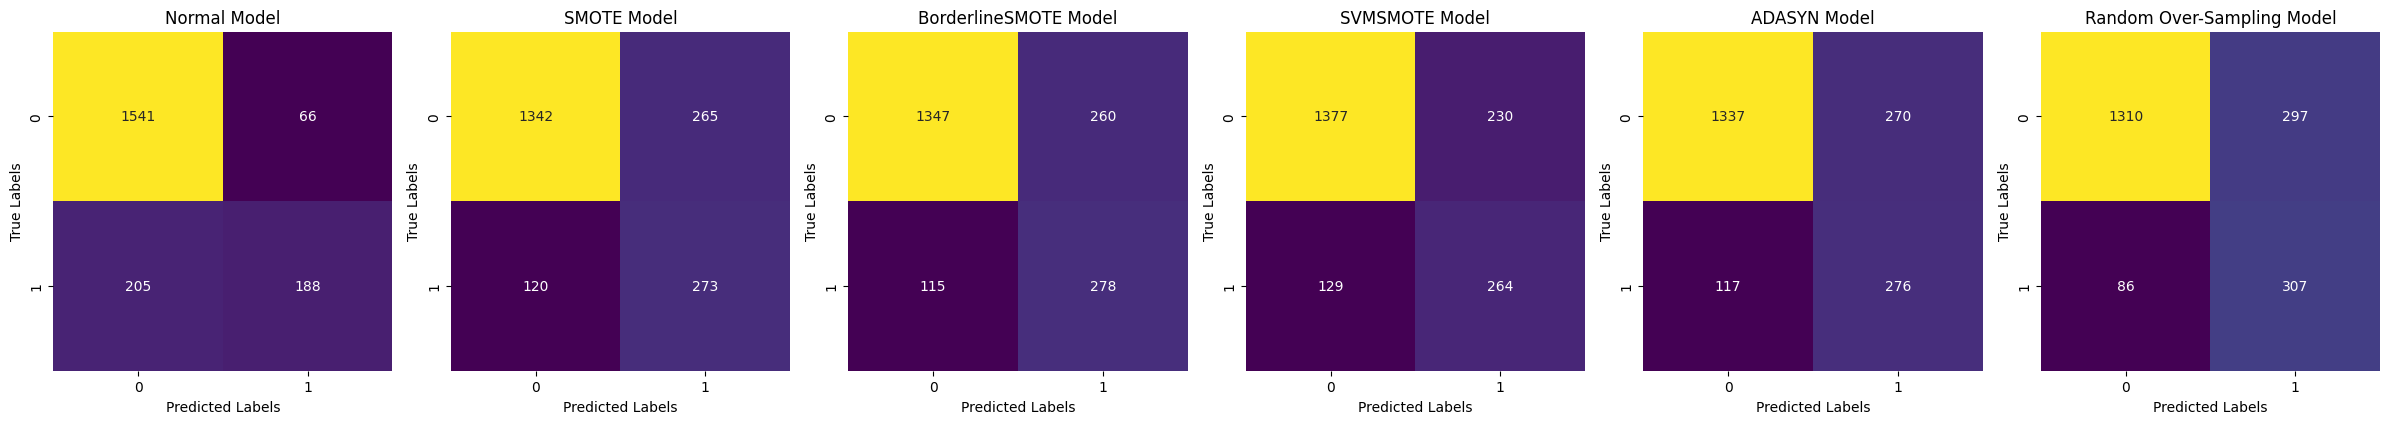

Confusion Matrices for AdaBoost:


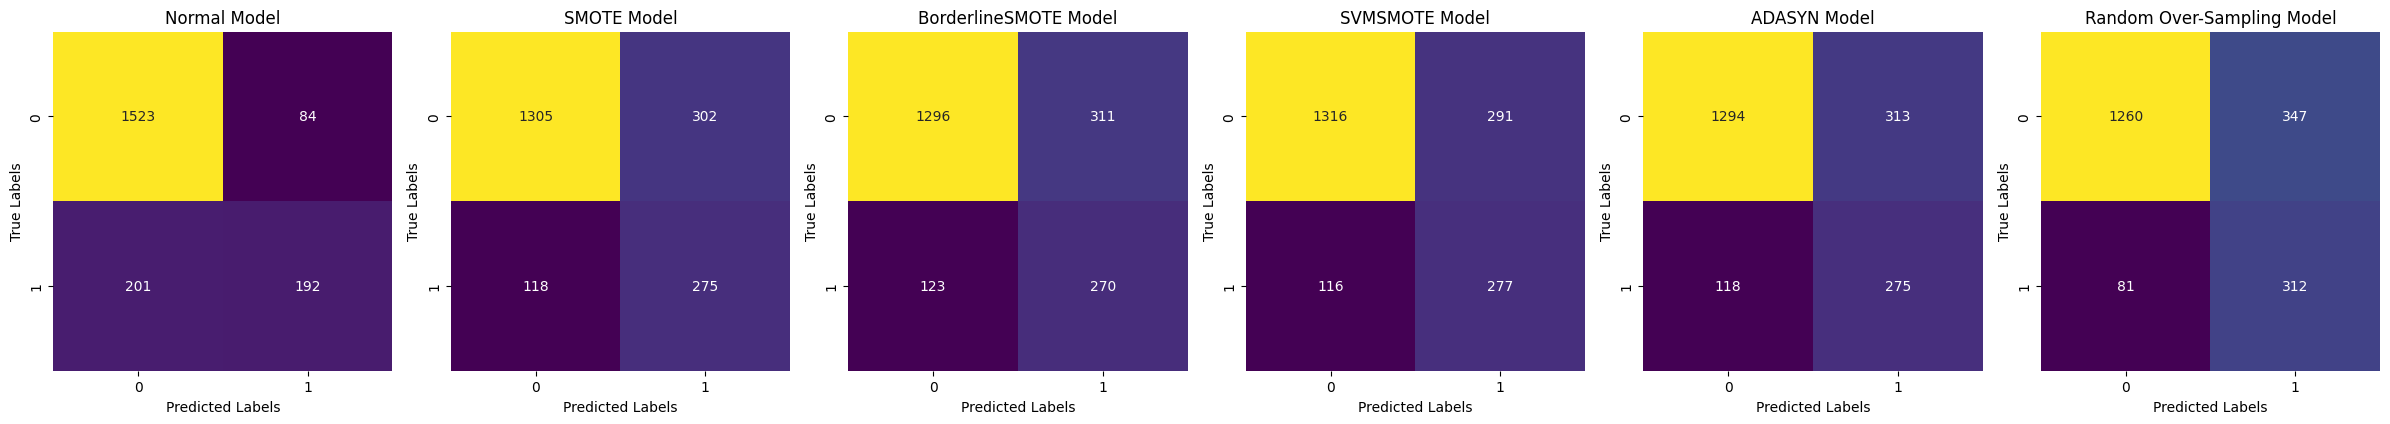

In [140]:
# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Define resampling techniques
resampling_techniques = {
    'Normal': None,
    'SMOTE': SMOTE(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42, kind='borderline-1'),
    'SVMSMOTE': SVMSMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'Random Over-Sampling': RandomOverSampler(random_state=42)
}

# Fit classifiers and calculate confusion matrices
for name, clf in classifiers.items():
    print(f"Confusion Matrices for {name}:")

    # Initialize subplots with square aspect ratio
    fig, axes = plt.subplots(1, 6, figsize=(24, 24))  # Increase height for square plots
    axes = axes.flatten()

    for idx, (technique_name, technique) in enumerate(resampling_techniques.items()):
        if technique is not None:
            # Apply resampling
            X_train_resampled, y_train_resampled = technique.fit_resample(X_train, y_train)
            clf.fit(X_train_resampled, y_train_resampled)
        else:
            # Fit on original data
            clf.fit(X_train, y_train)
            X_test_encoded = X_test  # No resampling applied to the test set

        # Predict and calculate confusion matrix
        y_pred = clf.predict(X_test)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Plot confusion matrix without color bar
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", ax=axes[idx], square=True, cbar=False)
        axes[idx].set_title(f"{technique_name} Model")
        axes[idx].set_xlabel("Predicted Labels")
        axes[idx].set_ylabel("True Labels")

    plt.tight_layout()
    plt.show()

# Feature Importance based on XGBoost

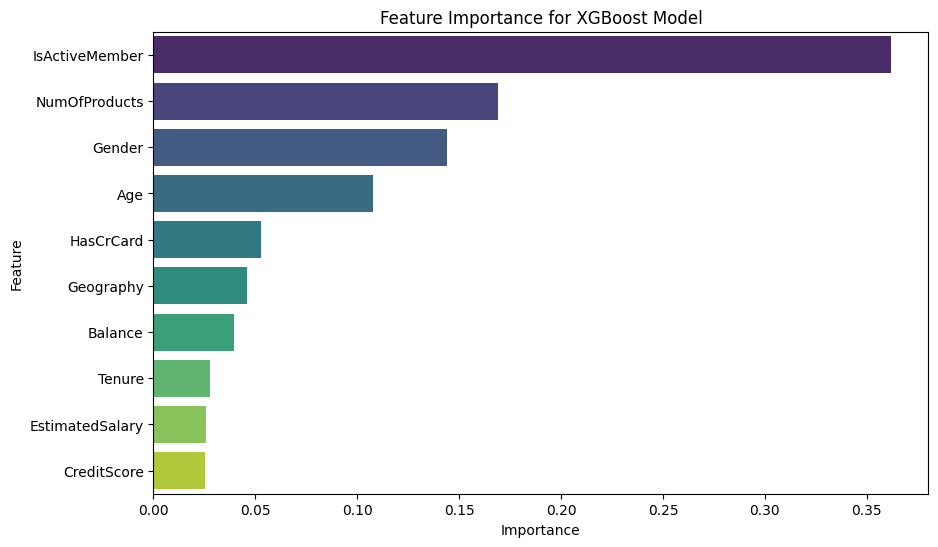

In [44]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# Extract feature importance
feature_importance = xgb_model.feature_importances_
features = X_train.columns

# Creating a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# SAVING THE MODEL USING JOBLIB

In [44]:
import joblib

joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']

# The saved model will be deployed using streamlit. Thank you!